<a href="https://colab.research.google.com/github/IanPerigoVianna/olimpcs/blob/main/olympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime,date, time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix


ImportError: cannot import name 'pandas_profiling' from 'pandas' (/usr/local/lib/python3.10/dist-packages/pandas/__init__.py)

In [2]:
data = pd.read_csv('athlete_events.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [4]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


271.116 registros
registros do ano de 1896 - 2016


In [5]:
categoric = data.select_dtypes(include = object)
numeric = data.select_dtypes(exclude= object)

In [6]:
categoric.describe()

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


In [7]:
categoric['Event'].head(10)

0           Basketball Men's Basketball
1          Judo Men's Extra-Lightweight
2               Football Men's Football
3           Tug-Of-War Men's Tug-Of-War
4      Speed Skating Women's 500 metres
5    Speed Skating Women's 1,000 metres
6      Speed Skating Women's 500 metres
7    Speed Skating Women's 1,000 metres
8      Speed Skating Women's 500 metres
9    Speed Skating Women's 1,000 metres
Name: Event, dtype: object

In [8]:
categoric[['Sport','Event']].sample(70)

,Sport,Event
244412,Gymnastics,Gymnastics Men's Rings
108412,Wrestling,"Wrestling Men's Featherweight, Greco-Roman"
242072,Athletics,Athletics Women's 4 x 100 metres Relay
259237,Equestrianism,"Equestrianism Men's Three-Day Event, Individual"
104115,Speed Skating,"Speed Skating Men's 10,000 metres"
...,...,...
254899,Alpine Skiing,Alpine Skiing Men's Slalom
241319,Athletics,"Athletics Men's 5,000 metres"
216953,Swimming,Swimming Men's 400 metres Individual Medley
75899,Tennis,Tennis Mixed Doubles


- Na parte categórica vou tentar processar a o texto do evento para poder retirar a categoria do gênero (masculino,feminino) e categoria do esporte( 500m, 1,000m).
- Fazer dummies dos gêneros
- Dropar games pois temos duas colunas distintas uma númerica com o ano da olimpiada e outra do tipo de olimpiada (summer, winter)
- Fazer dummie do tipo de olimpiada
- Verificar a relação entre country e NOC e se poderemos dropar alguma delas.

- Análises Numéricas
- Valores nulos, anomalias

In [9]:
print(numeric.isnull().mean()*100)
# 23,22 e 3 % de valores nulos em (weight, height e age)
# Valores muito similares de nulos em peso e altura, vou fazer uma matriz para verificar possível correlação

ID         0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Year       0.000000
dtype: float64


<Axes: >

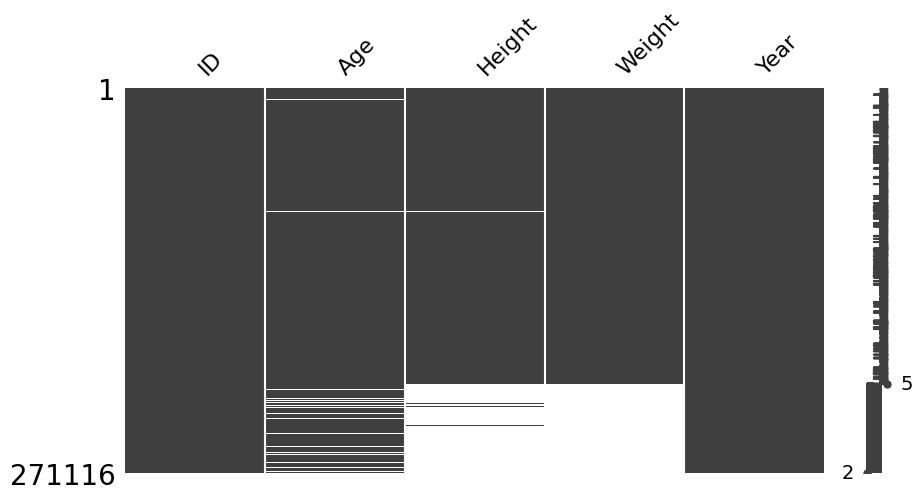

In [10]:
matriz = numeric.sort_values('Weight')
msno.matrix(matriz,figsize=(10,5))


In [ ]:
pandas_profiling.ProfileReport(df)

- Forte relação de valores nulos entre peso, altura e vários de sexo.
- Medalhas é normal pois apenas são preenchidos com os atletas que ganharam medalha de ouro,prata ou bronze os demais são nulos

- Optarei por fazer uma inputação mais avançada com KNN ou similar para o sexo
- Vamos verificar os outliers para decidir entre média e mediana

<ipython-input-58-cc3e9b15d1cf>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric, y=feature, palette="muted", ax=axes[0,i])
<ipython-input-58-cc3e9b15d1cf>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric_without_out, y=feature, palette="muted", ax=axes[1,i])
<ipython-input-58-cc3e9b15d1cf>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=numeric, y=feature, palette="muted", ax=axes[0,i])
<ipython-input-58-cc3e9b15d1cf>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be 

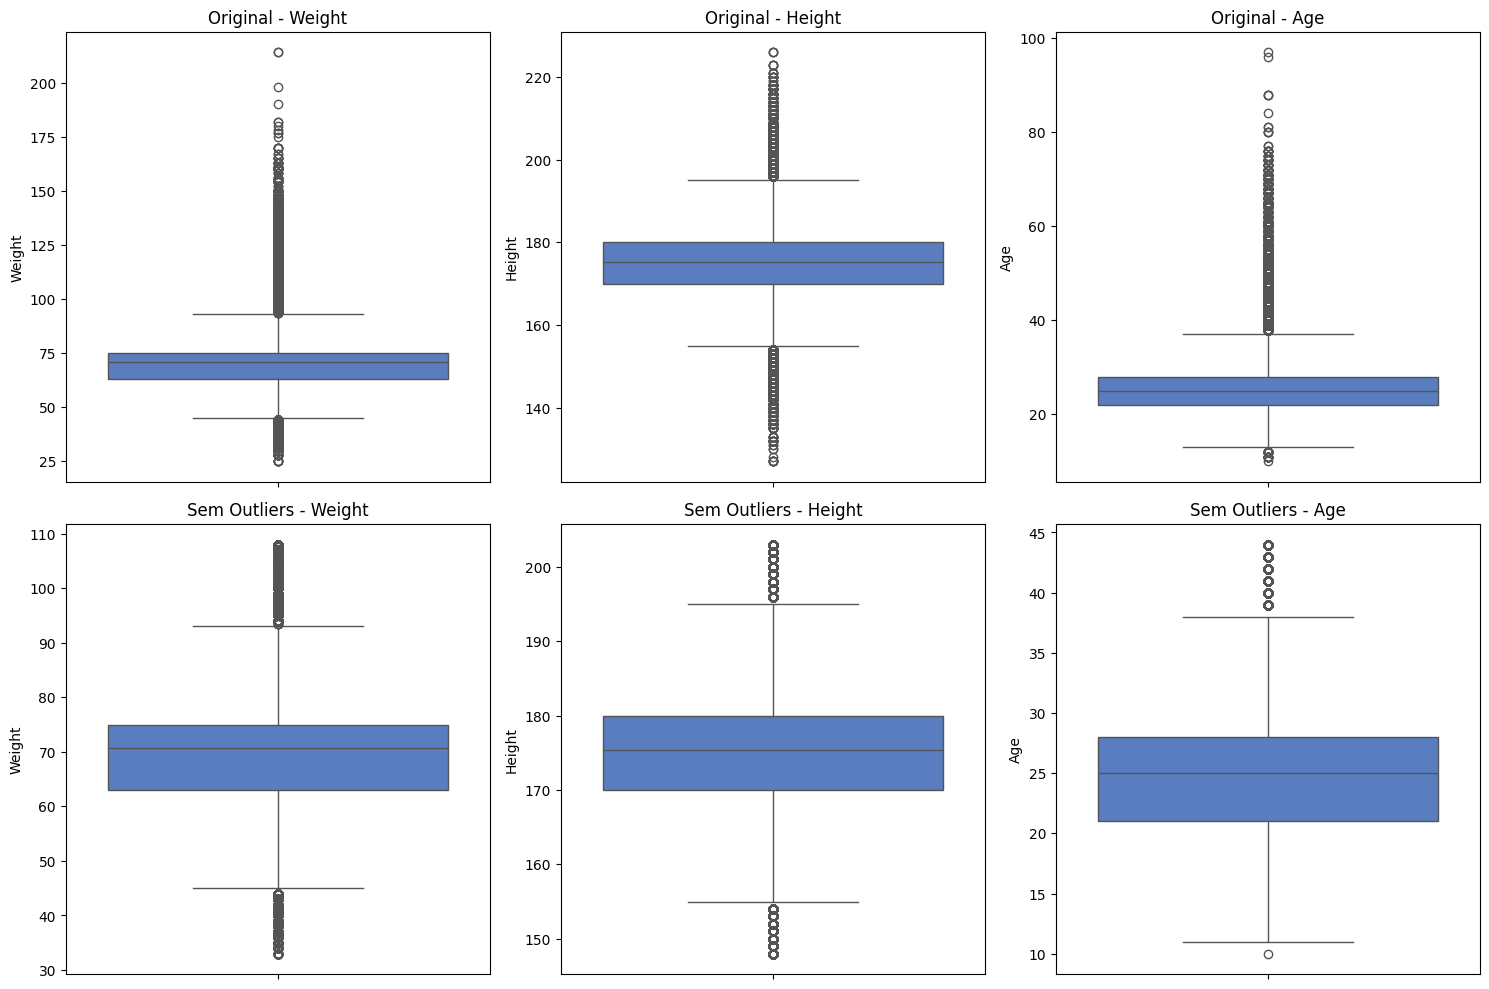

In [58]:

def drop_outliers_3std_multi(df, columns):
    df2 = df.copy()

    for column in columns:
        m = df2[column].mean()
        sd = df2[column].std()
        upper = m + 3*sd
        lower = m - 3*sd

        i_up = df2[df2[column] > upper].index
        i_lo = df2[df2[column] < lower].index

        df2.drop(i_up, axis=0, inplace=True)
        df2.drop(i_lo, axis=0, inplace=True)

    return df2

# Lista de features que você deseja incluir no gráfico
features_to_plot = ['Weight', 'Height', 'Age']


num_cols = len(features_to_plot)

# Criar subplots
fig, axes = plt.subplots(ncols=num_cols, nrows=2, figsize=(5*num_cols, 10))


for i, feature in enumerate(features_to_plot):
    # Boxplot Original
    sns.boxplot(data=numeric, y=feature, palette="muted", ax=axes[0,i])
    axes[0,i].set_title(f"Original - {feature}")

    # Remover outliers usando drop_outliers_3std_multi
    numeric_without_out = drop_outliers_3std_multi(numeric, columns=[feature])

    # Boxplot Sem Outliers
    sns.boxplot(data=numeric_without_out, y=feature, palette="muted", ax=axes[1,i])
    axes[1, i].set_title(f"Sem Outliers - {feature}")


plt.tight_layout()
plt.show()


Vamos calcular a média, moda e mediana para imputação

In [59]:
mean_wei= numeric['Weight'].mean()
mean_hei = numeric['Height'].mean()
mean_age = numeric['Age'].mean()

numeric['Weight'] = numeric['Weight'].fillna(mean_wei)
numeric['Height'] = numeric['Height'].fillna(mean_hei)
numeric['Age'] = numeric['Age'].fillna(mean_age)



In [60]:
categoric['Medal'].isnull().sum()

0

In [61]:
numeric.sample(10)

,Age,Height,Weight
84668,25.556898,175.33897,70.702393
74550,27.000000,175.33897,56.000000
46612,17.000000,180.00000,68.000000
23390,33.000000,173.00000,68.000000
154117,23.000000,175.00000,77.000000
135415,24.000000,174.00000,60.000000
231021,30.000000,175.33897,70.702393
132836,19.000000,171.00000,65.000000
200169,18.000000,175.33897,70.702393
163189,24.000000,168.00000,58.000000


In [62]:
categoric = categoric.drop(['Games'], axis=1)


KeyError: "['Games'] not found in axis"

In [63]:
team = categoric['Team']
categoric = categoric.drop('Team', axis=1)

KeyError: 'Team'

-Team possui  mais de mil valores unicos o que é bem mais do que a quantidade de países, então optei por deixar a coluna NOC que é a abreviação do País e passá-la para uma variável para uso posterior.

In [19]:
categoric.head()

,Name,Sex,NOC,Season,City,Sport,Event,Medal
0,A Dijiang,M,CHN,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,CHN,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,DEN,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,NED,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Vamos começar a fazer dummies de algumas features:
- Sex (0 homem, 1 mulher)
- season (0 summer, 1 winter)
- Medal (0 para nulos, 1 para gold,silver,bronze)
- sport (Vamos checar primeiro se há valores iguais proém escritos diferentes)

In [64]:
# Substituir 0 por 'Homens' e 1 por 'Mulheres' na coluna 'Sex'
categoric['Sex'] = categoric['Sex'].replace({'M': 0, 'F': 1})
categoric['Season'] = categoric['Season'].replace({'Summer' : 0 , 'Winter': 1})



categoric['Medal'] = categoric['Medal'].fillna(0).astype(bool).astype(int)
# Exibindo o DataFrame resultante
categoric[['Name','Sex','Season','Medal']].sample(10)

,Name,Sex,Season,Medal
193342,Penka Mircheva Prisadashka,1,0,0
243541,Edward Frank Tritschler,0,0,0
209868,Ramn Jess Sandoval Mendoza,0,0,0
256842,Wang Xiulan,1,1,0
117400,Georgi Khristov,0,0,0
169738,Nelia Ihorivna Neporadna,1,0,0
227071,Jesper Mllegaard Staal,0,0,0
264061,Shizuo Yada,0,0,0
234757,Miya Tachibana,1,0,1
131803,Sture Bror Landqvist,0,0,0


In [65]:
categoric_zero = (categoric['Medal'] ==0).sum()
categoric_zero

# Quantidade de valorez igual a 0 é igual a quantidade de valores nulos da feature Medal do dataset original
# Dummie funcionou

231333

In [66]:
porcent_winners = (categoric['Medal'] == 1).sum() / len(categoric['Medal']* 100)
print('Porcentagem de medalhista das olimpiadas: {:.2f}%'.format(porcent_winners))

Porcentagem de medalhista das olimpiadas: 0.15%


Não foi observado diferenças da minúscula e maiúsculas, que tende a ser o erro mais comum. Não vou aplicar comparação entre strings

In [67]:
# Mesma quantidade sem ter feito a padronização de maiúsculas e minúsculas
categoric['Sport'].describe()

count        271116
unique           66
top       Athletics
freq          38624
Name: Sport, dtype: object

In [24]:
categoric['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

Existe uma grande quantidade de valores únicos na feature eventos.
Foi observado que na feature há o nome do esporte,  a distinção de categoria feminina e masculina, a metragem/ tipo de prova
Precisa ser feito o tratamento de texto e adicionado algumas nomes desse texto para novas features para poder ser analisado e feito correlações

In [ ]:

from sklearn.preprocessing import OneHotEncoder



# Extraindo as informações relevantes da coluna 'Event'
#categoric[['Sport','Event_Distance','kind_of_Distance']] = categoric['Event'].str.extract(
 #   r"(\b\w+\b).*?(\d+).*?(\b\w+\b)."
#)
categoric[['Sport', 'Event_Distance', 'kind_of_Distance']] = categoric['Event'].str.extract(
    r"(\b\w+\b).*?(\d+).*?(\d*\D)"
)

# Removendo a coluna original 'Event'
#categoric = categoric.drop('Event', axis=1)

# Criando variáveis dummy usando OneHotEncoder
#encoder = OneHotEncoder(sparse=False, drop='first')
#dummy_variables = pd.DataFrame(
#    encoder.fit_transform(categoric[['Sport','Event_Distance','kind_of_Distance']]),
#    columns=encoder.get_feature_names_out(['Sport','Event_Distance','kind_of_Distance'])
#)

# Concatenando as variáveis dummy com o DataFrame original
#categoric_encoded = pd.concat([categoric, dummy_variables], axis=1)


In [ ]:
categoric_encoded[categoric_encoded['Sport_Athletics'] == 1] [['Sport_Athletics','Name','Event_Distance','kind_of_Distance']].head(10)

,Sport_Athletics,Name,Event_Distance,kind_of_Distance
26,1.0,"Cornelia ""Cor"" Aalten (-Strannood)",100,
27,1.0,"Cornelia ""Cor"" Aalten (-Strannood)",4,
98,1.0,Jamale (Djamel-) Aarrass (Ahrass-),1,","
130,1.0,Erling Rudolf Aastad,4,
148,1.0,Antonio Abadia Beci,5,","
190,1.0,Jos Manuel Abascal Gmez,1,","
191,1.0,Jos Manuel Abascal Gmez,1,","
197,1.0,Emanuele Abate,110,
203,1.0,Carlos Rodolfo Abaunza Balladares,100,
215,1.0,Gana Abba Kimet,100,


In [68]:
categoric.head(10)

categoric = categoric.drop('City',  axis =1)

KeyError: "['City'] not found in axis"

In [69]:
categoric['Sport'].describe()

count        271116
unique           66
top       Athletics
freq          38624
Name: Sport, dtype: object

In [70]:
 #Criando variáveis dummy usando OneHotEncoder
 from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
dummy_variables = pd.DataFrame(
    encoder.fit_transform(categoric[['Sport','NOC']]),
    columns=encoder.get_feature_names_out(['Sport','NOC'])
)

categoric_encoded = pd.concat([categoric, dummy_variables], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
categoric_encoded.sample(10)

,Name,Sex,NOC,Season,Sport,Event,Medal,Sport_Alpine Skiing,Sport_Alpinism,Sport_Archery,...,NOC_VIE,NOC_VIN,NOC_VNM,NOC_WIF,NOC_YAR,NOC_YEM,NOC_YMD,NOC_YUG,NOC_ZAM,NOC_ZIM
189219,Andreina del Valle Pinto Prez,1,VEN,0,Swimming,Swimming Women's 400 metres Individual Medley,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186448,Michele Pessoa,1,ANG,0,Swimming,Swimming Women's 100 metres Freestyle,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230227,Stoyan Koev Stoyanov,0,BUL,0,Gymnastics,Gymnastics Men's Rings,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,Abdel Wahab Abdullah Salih,0,SUD,0,Boxing,Boxing Men's Middleweight,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19712,Rolf ge Berg,0,NOR,1,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197975,Antoine Rebetez,0,SUI,0,Gymnastics,Gymnastics Men's Parallel Bars,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133572,Neale John Lavis,0,AUS,0,Equestrianism,"Equestrianism Men's Three-Day Event, Individual",1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74466,Piotr Gabrych,0,POL,0,Volleyball,Volleyball Men's Volleyball,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175726,Evangelos Oikonomou,0,GRE,0,Rowing,Rowing Men's 17-Man Naval Rowing Boats,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34746,Silvio Canevari,0,ITA,0,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
categoric_encoded = categoric_encoded.drop(['Sport', 'Event', 'Name','NOC'], axis =1)

In [72]:
numeric = numeric.drop(['Year','ID'], axis =1)

KeyError: "['Year', 'ID'] not found in axis"

In [73]:
df = pd.concat([categoric_encoded , numeric], axis=1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Columns: 300 entries, Sex to Weight
dtypes: float64(297), int64(3)
memory usage: 620.5 MB


In [74]:
features_standarlize = df[['Age','Weight','Height']]

scaler = StandardScaler()

normalized_df = scaler.fit_transform(features_standarlize)

df[['Age','Weight','Height']] = normalized_df

In [75]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)




In [76]:
X = df.drop(['Medal'], axis =1)
y = df['Medal']

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 271116 entries, 0 to 271115
Series name: Medal
Non-Null Count   Dtype
--------------   -----
271116 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [77]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

tree_model = DecisionTreeClassifier(max_depth=7).fit(x_train,y_train)

In [78]:
prediction = tree_model.predict(x_test)

accuracy = accuracy_score(prediction, y_test)
f1 = f1_score(prediction, y_test, average = "weighted")

print("Acurácia: ", accuracy)
print("F1 Score: ", f1)

Acurácia:  0.8606135120181964
F1 Score:  0.9064803133968639


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


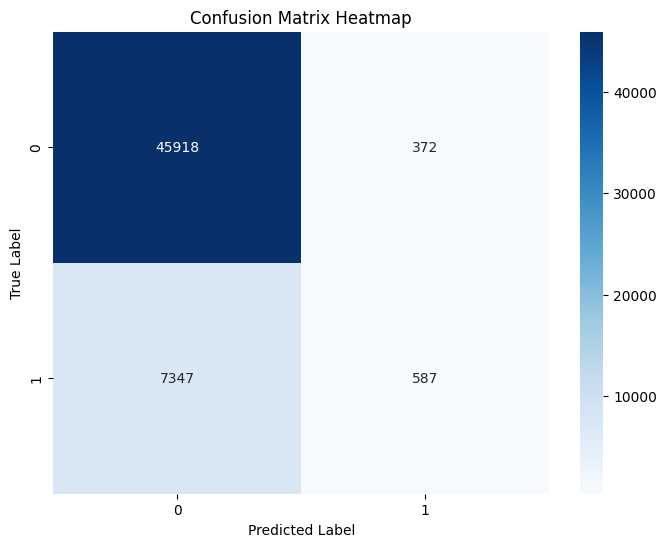

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92     46290
           1       0.61      0.07      0.13      7934

    accuracy                           0.86     54224
   macro avg       0.74      0.53      0.53     54224
weighted avg       0.83      0.86      0.81     54224



In [79]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)


target_names = sorted(set(y_test.values))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(y_test.values, pred, labels=target_names)

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
# Generate and print the classification report
report = classification_report(y_test.values, pred, labels=target_names)
print("Classification Report:")
print(report)

-Precisão alta para classe 0 (não ganhou medalhas) e mais baixa para 1 (ganhou medalhas).
-Investigar se a baixa porcentagem de valores 1 (0,15%) pode afetar a precisão.
-taxa de verdadeiros negativo alta 99%
- taxa de verdadeiros positivo baixa 7%
- f1 score: para negativos 0,92. para positivos 0,13

In [80]:

coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})


feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

feature_importance.head(50)



,Feature,Coefficient
45,Sport_Rugby,4.685884
34,Sport_Lacrosse,3.369158
280,NOC_URS,2.929522
142,NOC_GDR,2.759918
5,Sport_Art Competitions,-2.533646
3,Sport_Alpinism,2.444310
282,NOC_USA,2.307459
132,NOC_EUN,2.301708
40,Sport_Polo,2.189613
231,NOC_PUR,-2.096472


In [81]:
features_of_interest = ['Age', 'Sex', 'Height', 'Weight']
coeficientes_interesse = feature_importance[feature_importance['Feature'].isin(features_of_interest)]
print("\nCoeficientes específicos para as features de interesse:")
print(coeficientes_interesse)


Coeficientes específicos para as features de interesse:
    Feature  Coefficient
0       Sex     0.207537
296     Age     0.087423
298  Weight     0.056711
297  Height     0.051928


In [50]:
 from sklearn.ensemble import (
 RandomForestClassifier
 )
 from sklearn import (
 ensemble,
 preprocessing,
 tree,
 )

In [51]:
 rf = ensemble.RandomForestClassifier(
n_estimators=50, random_state=40
 )
 rf.fit(X_train, y_train)
RandomForestClassifier(bootstrap=True,
class_weight=None, criterion='gini',
max_depth=None, max_features='auto',
max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=10,
n_jobs=1, oob_score=False, random_state=42,
verbose=0, warm_start=False)

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'min_impurity_split'

In [ ]:
rf.score(X_test, y_test)

In [ ]:
metrics.precision_score(
 y_test, rf.predict(X_test)
 )